In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd

In [2]:
df = pd.read_csv("torquato_hardspheres.txt")

In [3]:
df.head()

,r,0.4,0.5,0.62
0,0.0,0.6000,0.5000,0.3800
1,0.4,0.4828,0.3546,0.2053
2,0.8,0.4003,0.2709,0.1416
3,1.2,0.3544,0.2360,0.1309
4,1.6,0.3417,0.2347,0.1405


In [4]:
title_size = 36
xLabel_size = 42
yLabel_size = xLabel_size
tick_mark_label_size = 28
legend_size = 32
line_width = 6
bbox = (0., 0.8, 1.0, .102)
bbox_comp = (0., 0.25, 0.95, .102)
gamma_alpha = 0.6

In [5]:
def exponential_boolean_covariance(nu, r, M):
    heaviside = lambda x: 0.5 if x == 0 else 0 if x < 0 else 1
    a = 2*np.array([heaviside(v-2*M) for v in r])
    b = 1+3./4.*r/M-1./16.*np.power(r/M, 3)
    c = np.array([heaviside(2*M-v) for v in r])
    return np.exp(-nu*(a+b*c))

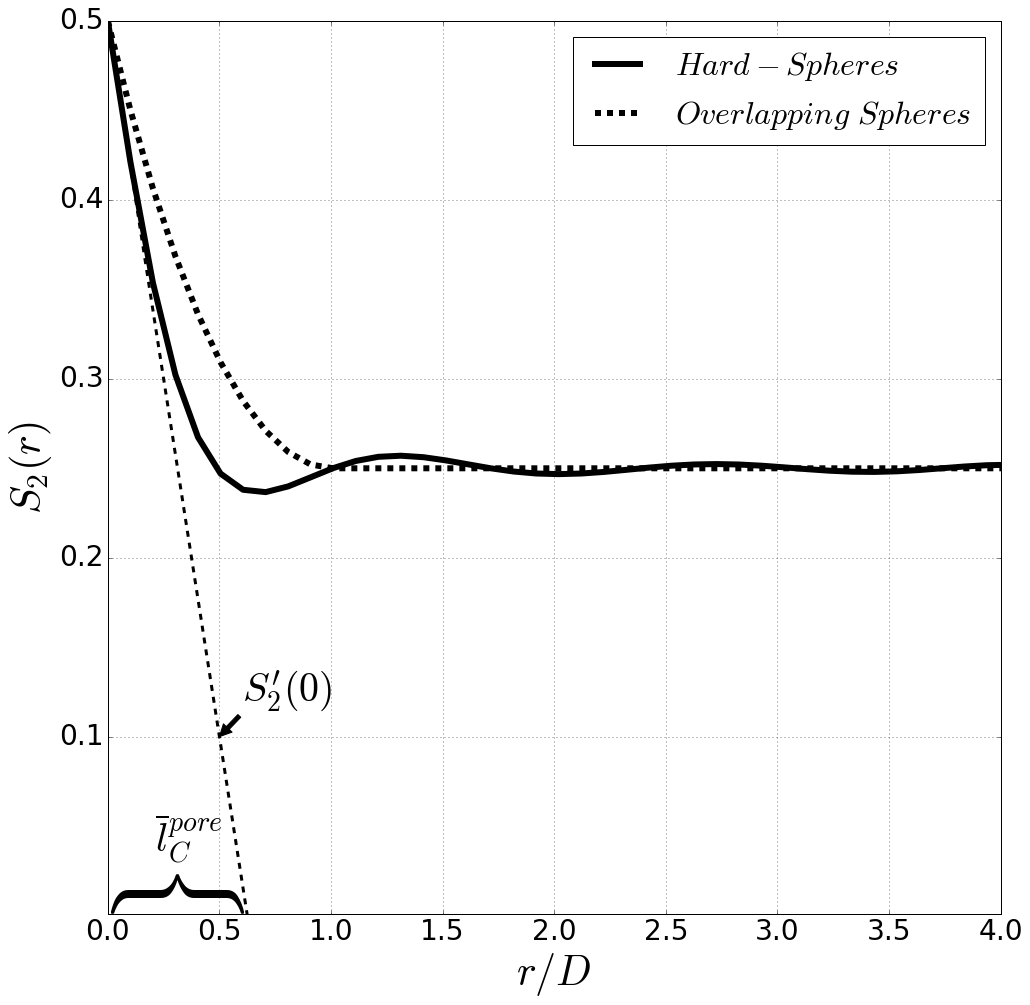

In [11]:
fig, ax = plt.subplots(figsize=(16,16))

ax.set_ylim(0.001, 0.5)
ax.set_xlim(0, 4.0)

ax.set_xlabel(r'$r/D$', fontsize=xLabel_size)
ax.set_ylabel(r"$S_2(r)$", fontsize=yLabel_size) 

fit_cov = np.polyfit(df["r"]/2., df["0.5"], 10)
poly_fit = np.poly1d(fit_cov)

x_fit = np.linspace(0, 10, 100)
plot_data = poly_fit(x_fit)

x_slope = np.linspace(0, 1.0)
y_slope_bool = -0.8*x_slope+0.5

exponential_plot  = exponential_boolean_covariance(-np.log(0.5), x_fit, 0.5)

ax.plot(x_fit, plot_data, label=r'$Hard-Spheres$', alpha=1.0, linestyle="-", linewidth=line_width, color="black")
ax.plot(x_fit, exponential_plot, label=r'$Overlapping \ Spheres $', alpha=1.0, linestyle="--", linewidth=line_width, color="black")
ax.plot(x_slope, y_slope_bool, alpha=1.0, linestyle="--", linewidth=3, color="black")

ax.text(0, -0.03, r'$\{$', rotation=-90, fontsize=110)
ax.text(0.21, 0.035, r'$\overline{l}_C^{pore}$',rotation=0, fontsize=40)

ax.annotate(r"$S_2'(0)$", xy=(0.5, 0.1), xytext=(0.6, 0.12), 
            fontsize=40, arrowprops=dict(facecolor='black', shrink=0.001))

for item in ax.get_xticklabels():
    item.set_fontsize(tick_mark_label_size)
for item in ax.get_yticklabels():
    item.set_fontsize(tick_mark_label_size)

plt.grid()

legend = plt.legend(fontsize=legend_size)
frame = legend.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')

fig.savefig("../../../paper/figures/hard_soft_spheres_figure_methodology.png", bbox_extra_artists=None, bbox_inches='tight', dpi=300)
plt.show()
plt.close()